# Experiment 10: Solving a Markov Decision Process (MDP)


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt










# Task 1: Define the GridWorld (The MDP)

In [2]:
# Grid dimensions (3x4)
rows, cols = 3, 4

# Define walls, terminal states, and rewards
wall = (1, 1)
goal = (0, 3)
pit = (1, 3)
living_reward = -0.04  # default living penalty
gamma = 0.99           # discount factor

# Define valid states (all except the wall)
states = [(r, c) for r in range(rows) for c in range(cols) if (r, c) != wall]

# Define rewards for each state
def get_reward(state):
    if state == goal:
        return 1.0
    elif state == pit:
        return -1.0
    else:
        return living_reward

# Actions
actions = ['up', 'down', 'left', 'right']

# Movement directions
action_effects = {
    'up': (-1, 0),
    'down': (1, 0),
    'left': (0, -1),
    'right': (0, 1)
}

# Get next states with probabilities
def get_next_states(state, action):
    if state in [goal, pit]:
        return [(1.0, state)]  # Terminal state: stays there

    transitions = []
    directions = {
        'up': ['up', 'left', 'right'],
        'down': ['down', 'right', 'left'],
        'left': ['left', 'down', 'up'],
        'right': ['right', 'up', 'down']
    }
    probs = [0.8, 0.1, 0.1]

    for dir_, prob in zip(directions[action], probs):
        dr, dc = action_effects[dir_]
        new_r, new_c = state[0] + dr, state[1] + dc

        # Check boundaries and wall
        if (0 <= new_r < rows and 0 <= new_c < cols and (new_r, new_c) != wall):
            next_state = (new_r, new_c)
        else:
            next_state = state
        transitions.append((prob, next_state))

    return transitions


# Task 3: Policy Extraction


In [3]:


def extract_policy(V):
    policy = {}
    for s in states:
        if s in [goal, pit]:
            policy[s] = None
            continue
        Q_values = {}
        for a in actions:
            q = 0
            for prob, next_s in get_next_states(s, a):
                q += prob * (get_reward(next_s) + gamma * V[next_s])
            Q_values[a] = q
        best_action = max(Q_values, key=Q_values.get)
        policy[s] = best_action
    return policy



# Task 4: Visualization

In [4]:


def plot_value_function(V, title="State Value Function"):
    grid = np.zeros((rows, cols))
    for r in range(rows):
        for c in range(cols):
            if (r, c) == wall:
                grid[r, c] = np.nan
            else:
                grid[r, c] = V[(r, c)]
    plt.figure(figsize=(6, 4))
    sns.heatmap(grid, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
    plt.title(title)
    plt.show()

def plot_policy(policy, title="Optimal Policy"):
    arrow_map = {'up': '^', 'down': 'v', 'left': '<', 'right': '>'}
    grid = np.full((rows, cols), '', dtype=object)
    for r in range(rows):
        for c in range(cols):
            s = (r, c)
            if s == wall:
                grid[r, c] = 'X'
            elif s == goal:
                grid[r, c] = '+1'
            elif s == pit:
                grid[r, c] = '-1'
            else:
                grid[r, c] = arrow_map.get(policy[s], '')
    for row in grid:
        print(' '.join(row))
    plt.figure(figsize=(6, 4))
    sns.heatmap(np.zeros((rows, cols)), annot=grid, fmt='', cbar=False, linewidths=0.5)
    plt.title(title)
    plt.show()



# Run Experiment

Final Value Function:


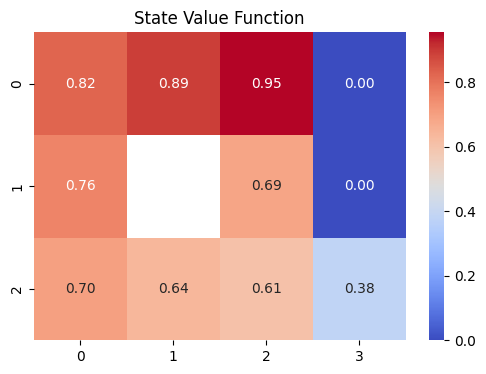

Final Policy:
> > > +1
^ X ^ -1
^ < ^ <


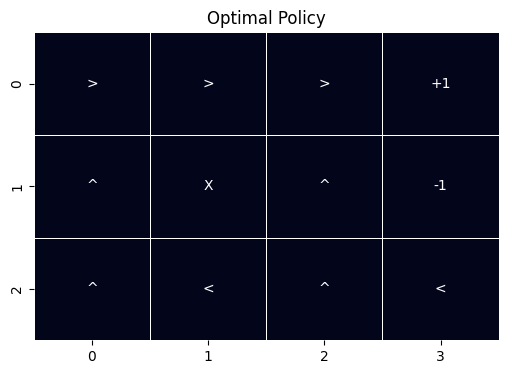

In [8]:
def value_iteration(theta=1e-6):
    V = {s: 0 for s in states}  # Initialize value function to zeros

    while True:
        delta = 0
        for s in states:
            if s in [goal, pit]:  # Terminal states have fixed values
                continue

            v = V[s]
            q_values = []
            for a in actions:
                q = 0
                for prob, next_s in get_next_states(s, a):
                    # Calculate expected value of next state
                    q += prob * (get_reward(next_s) + gamma * V[next_s])
                q_values.append(q)

            if q_values: # Ensure there are Q-values to take max from
                V[s] = max(q_values)
            else:
                V[s] = get_reward(s) # If no actions possible (shouldn't happen in this grid, but as a safeguard)

            delta = max(delta, abs(v - V[s]))

        if delta < theta:
            break
    return V

V = value_iteration()
policy = extract_policy(V)

print("Final Value Function:")
plot_value_function(V)

print("Final Policy:")
plot_policy(policy)
